## Module_2: *(Template)*

## Team Members:
Kayla and Alex 

## Project Title:
Deep Dive into FIbrosis: Predicting Lung Scarring by Depth



## Project Goal:
This project seeks to better understand how the severity of fibrosis changes throughout a fibrotic lung. From this, the goal is to use interpolation strategies to predict the amount of fibrosis when given a specified depth. 


## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence 
    - Idiopathic pulmonary fibrosis has an estimated prevalence of 13 to 20 per 100,000 people worldwide
    - In US, 30,000 to 40,000 new cases are diagnosed each year
* Risk factors (genetic, lifestyle)
    - While the main cause of IPF is unknown, there are certain condtion that can exacerbate symptoms and make you more prone to the disease 
    - genetic mutations in TERC and TERP have been found in about 15% of familial cases (not idiopathic) 
        - TERC and TERP are related to the develeopment of telomerase, without them functioning properly it is suspected that lung tissue/ cells die prematurely leading to the fibrotic tissue 
    - lifestyle contributions that are often seen in cases of IFP are exposure to wood/ metal dust, viral infections, and cigarette smoking. 
* Symptoms
    - shortness of breath and persistent dry/ hacking cough are the most common symptoms 
    - may also effect appetite leading to gradual weight loss 
    - scarred lungs are the diagnosing feature of IFP 
        - develops to the point in which lungs can no longer provide oxygen to the rest of the body 
        - can lead to lung cancer, blood clots, and pneumonia
* Standard of care treatment(s)
    - There are no current universal treatments/ cures for fibrosis due to its intricate nature in the lungs
    - Medications that attempt to improve qualitity of life and decrease primilinary symptoms are pirfenidone (Esbriet) or nintedanib (Ofev).
        - attempt to slow the progress of fibrotic tissue development
    - Due to its relationship with GERD, certain anti-acid medications may be perscribed in order to lessen complementary symptoms. 
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    - The primary effected mechanism is the pulmonary system, however the immune system also plays a major role in how fibrosis develops/ grows.
        - dysregulation of marcrophages leads to the release of pro-fibrotic factors such as TGF-β and PDGF. 
    - Cell proliferation and increase in growth factors also leads to the build up of tissue in the lungs


Work Cited 
- NIH - Idiopathic pulmonary fibrosis
- Mayo Clinic - Pulmonary Fibrosis
- NIH - Interpreting Immunoregulation in Lung Fibrosis: A New Branch of the Immune Model
- BMC - Pulmonary fibrosis: from mechanisms to therapies

## Data-Set: 
* Bleomycin was used to induce fibrosis in the lungs of mice and model IPF from Pierce-Cottler Lab
* The lungs were then harvested and sectioned transversely
    - gives multiple different verticle depths of the lung tissue
    - allows for studying how the different sample depths result in varying amount of fibrotic lung tissue 
* Slides were then imgaged (78 in total) 
    - white: fibrotic lesions
    - black: health lung
* Because this is a comparitive model, it is important to note that these conditions are not identical to human IPF and there may be differences
    - Mouse lungs have horizontal orientation, while human's have vertical which could effect how these results are applied. 


## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*


Counts of pixels by color in each image:
Image 1: /Users/kaylac/Downloads/comp_bme/MASK_Sk658 Llobe ch010018.jpg
White pixels: 33746
Black pixels: 4160558

Image 2: /Users/kaylac/Downloads/comp_bme/MASK_Sk658 Llobe ch010149.jpg
White pixels: 124833
Black pixels: 4069471

Image 3: /Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010077.jpg
White pixels: 99131
Black pixels: 4095173

Image 4: //Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010087.jpg
White pixels: 155019
Black pixels: 4039285

Image 5: /Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010113.jpg
White pixels: 119938
Black pixels: 4074366

Image 6: /Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010158.jpg
White pixels: 59788
Black pixels: 4134516


Summary Table
Image Name                            Depth (µm)  % White Pixels
-----------------------------------------------------------------
/Users/kaylac/Downloads/comp_bme/MASK_Sk658 Llobe ch010018.jpg           90            0.80
/Users/kaylac/Downloads/co

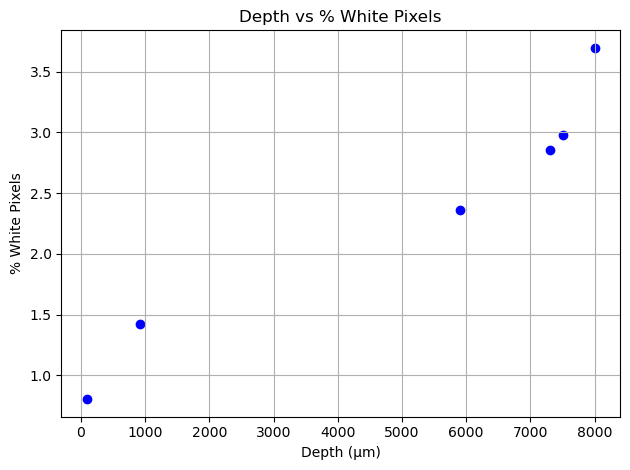

In [31]:
### '''Module 2: count black and white pixels in a .jpg and extrapolate points'''

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/kaylac/Downloads/comp_bme/MASK_Sk658 Llobe ch010018.jpg",
    r"/Users/kaylac/Downloads/comp_bme/MASK_Sk658 Llobe ch010149.jpg",
    r"/Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010077.jpg",
    r"//Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010087.jpg",
    r"/Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010113.jpg",
    r"/Users/kaylac/Downloads/comp_bme/MASK_SK658 Slobe ch010158.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    90,
    7500,
    5900,
    8000,
    7300,
    920
    ]

# Make the lists that will be used
# === Initialize lists ===
images = []
white_counts = []
black_counts = []
white_percents = []

# === Load all images ===
for filename in filenames:
    img = cv2.imread(filename, 0)
    if img is None:
        print(colored(f"Warning: Could not read image {filename}", "red"))
    images.append(img)

# === Count black and white pixels in each image ===
for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)
    white = np.sum(binary == 255)
    black = np.sum(binary == 0)
    white_counts.append(white)
    black_counts.append(black)

# === Print individual pixel counts ===
print(colored("\nCounts of pixels by color in each image:", "yellow"))
for x in range(len(filenames)):
    print(colored(f"Image {x+1}: {filenames[x]}", "red"))
    print(colored(f"White pixels: {white_counts[x]}", "white"))
    print(colored(f"Black pixels: {black_counts[x]}\n", "cyan"))

# === Calculate % white pixels ===
for x in range(len(filenames)):
    white_percent = 100 * (white_counts[x] / (black_counts[x] + white_counts[x]))
    white_percents.append(white_percent)

# === Print a clean summary table ===
print(colored("\nSummary Table", "yellow"))
print("=" * 65)
print(f"{'Image Name':<35} {'Depth (µm)':>12} {'% White Pixels':>15}")
print("-" * 65)
for i in range(len(filenames)):
    short_name = filenames[i].split("\\")[-1]
    print(f"{short_name:<35} {depths[i]:>12} {white_percents[i]:>15.2f}")
print("=" * 65)

# === Write results to CSV ===
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents
})
df.to_csv('Percent_White_Pixels.csv', index=False)
print(colored("\nCSV file 'Percent_White_Pixels.csv' has been created.", "green"))

# === Plot results ===
fig, ax = plt.subplots()
ax.scatter(depths, white_percents, color='blue')
ax.set_title('Depth vs % White Pixels')
ax.set_xlabel('Depth (µm)')
ax.set_ylabel('% White Pixels')
ax.grid(True)

plt.tight_layout()
plt.show()




Enter the depth at which you want to interpolate a point:  1000


The interpolated point is at the x-coordinate 1000.0 and y-coordinate 1.472078656364923.


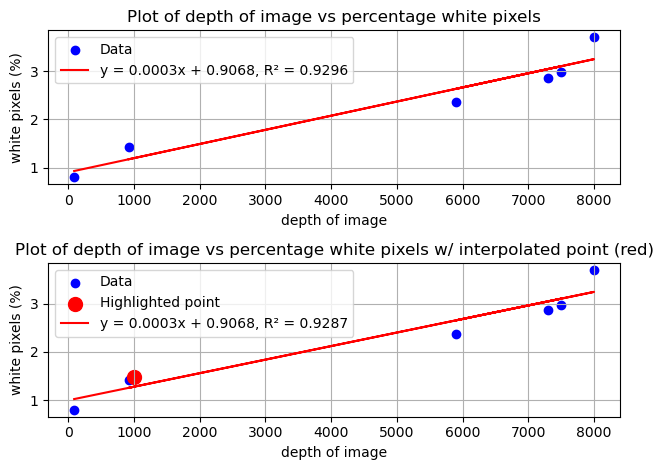

In [36]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels (%)')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels (%)')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')

import numpy as np

# For the first plot (without interpolated point)
# Calculate the linear regression
slope, intercept = np.polyfit(depths, white_percents, 1)
regression_line = slope * np.array(depths) + intercept

# Add the regression line to the first plot
axs[0].plot(depths, regression_line, color='red', linestyle='-', 
            label=f'y = {slope:.4f}x + {intercept:.4f}')
axs[0].legend()

# For the second plot (with interpolated point)
# Calculate the linear regression using all points including the interpolated one
slope_i, intercept_i = np.polyfit(depths_i, white_percents_i, 1)
regression_line_i = slope_i * np.array(depths_i) + intercept_i

# Add the regression line to the second plot
axs[1].plot(depths_i, regression_line_i, color='red', linestyle='-', 
            label=f'y = {slope_i:.4f}x + {intercept_i:.4f}')
axs[1].legend()

#extra -> shows linear is a good fit 
from scipy import stats
r_squared = stats.pearsonr(depths, white_percents)[0]**2
axs[0].legend([f'Data', f'y = {slope:.4f}x + {intercept:.4f}, R² = {r_squared:.4f}']) #for originial 

r_squared = stats.pearsonr(depths_i, white_percents_i)[0]**2
axs[1].legend([f'Data',f'Highlighted point', f'y = {slope:.4f}x + {intercept:.4f}, R² = {r_squared:.4f}']) #for interpolated 

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Verify and validate your analysis: 
*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

• For verification:
    • Does your plotted “percent white pixels” data support that fibrosis increases as
    you look deeper into the lung?
    • When you used linear and quadratic interpolation approaches, you estimated
    different y-values (i.e., percent white pixels) for lung depths you didn’t have
    measurements for – do your estimated values make sense compared to the other
    data points you measured?
• For validation:
    • you can inspect the depths at which our 78 different images were obtained in the
    “Filenames and Depths for Students.csv” file to locate a real image that is close to
    your interpolated depth. Then, analyze that image using your Python code. How
    does the percent white pixels that you measure in the real image compare to your
    interpolated value at/around that same depth?


## Conclusions and Ethical Implications: 
- Given the data, we concluded that an increase in sample death within a fibrotic lung, more fibrotic tissue would be found (incrase in white pixels percentage)
    - we are also concluding that there is a linear relationship between the depth of the image and white pixels, allowing us to interpolate based on the linear regression line
- From this conclusion a biopsy medical device should be able to collect samples deeper within the lung would be necessary to accurately find th efull extent in which fibrotic tissue exists in a give IPF patient. 
- The ethical implication of this conlcusion effects how a diagnositic tool would be used
    - because we believe that the deeper the lung tissue, the more fibrotic it is the device would have to biopsy deeper within a patients lung and could be more invasive.

## Limitations and Future Work: 
- The primary limitation of this conclusion is that it is a comparative model (mice lung's) and therefore there is the risk of translating it into human application.
- Future work can look towards obtaining human samples and seeing if these trends continue, if so then the development of this device would be of higher need and could more accurately help human cases. 

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*